In [86]:
import pandas as pd

"""
Reading the bert output
"""

mapping = {1: "fear", 2: "anger", 3: "guilt", 4: "joy", 5: "shame", 6: "disgust", 0: "sadness"}

drop_col = [9, 10, 11, 12, 13, 14, 15]
bert_train = pd.read_csv("train-16.csv", header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)
bert_val = pd.read_csv("val-16.csv", header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)
bert_test = pd.read_csv("test-16.csv", header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)

bert_all = pd.concat([bert_train, bert_val, bert_test])
"""
Reading the train, val , test data
"""
"""
train = pd.read_csv("/Users/ItishaYadav1/CL-Team-Lab-Emotion-Classification/data/isear/isear-train.csv", on_bad_lines='skip', header=None)
print("Training data shape = ", train.shape)
val = pd.read_csv("/Users/ItishaYadav1/CL-Team-Lab-Emotion-Classification/data/isear/isear-val.csv", header=None)
print("Validation data shape = ", val.shape)
test = pd.read_csv("/Users/ItishaYadav1/CL-Team-Lab-Emotion-Classification/data/isear/isear-test.csv", header=None)
print("Test data shape = ", test.shape)
"""
import numpy as np
import hashlib

def get_prediction(df):
    pred = []
    match = []
    hash = []
    conf = []
    for ind, row in df.iterrows():
        m = 0
        hash_object = hashlib.sha256(row[0].encode('utf-8'))
        hex_dig = hash_object.hexdigest()
        hash.append(hex_dig)
        proba = list(row[[2, 3, 4, 5, 6, 7, 8]])
        largest = np.argmax(proba)
        if float(largest) == row[1]:
            m = 1
        match.append(m)
        pred.append(float(largest))
        proba.sort(reverse=True)
        conf.append([hex_dig, m] + proba)

    df["predictions"] = pred
    df["match"] = match
    df["_id"] = hash
    df = df.rename(columns={0: "sentence", 1: "ytrue"})

    return df, pd.DataFrame(conf)

bert_all, conf_df = get_prediction(bert_all)
bert_all["ytrue_emotions"] = bert_all["ytrue"]\
    .map(mapping)
bert_all["predictions_emotions"] = bert_all["predictions"]\
    .map(mapping)

In [87]:
print(bert_all.shape)
bert_all["match"].value_counts()
print("Misclassification percent = ", round((bert_all["match"].value_counts()[0]/bert_all.shape[0])*100))

(7619, 14)
Misclassification percent =  19


In [88]:
print(conf_df.groupby(1).mean())
conf_df[conf_df[1] == 0]

          2         3         4         5         6         7         8
1                                                                      
0  0.468895 -1.524600 -2.693809 -3.241329 -3.736658 -4.332664 -4.967506
1  2.139970 -2.654546 -3.304612 -3.592845 -3.829158 -4.109175 -4.398682


,0,1,2,3,4,5,6,7,8
7,e529d0e588faf319a8d2a56bce1cfbaa33e95bd9675f2a...,0,-0.008224,-0.964764,-1.882689,-2.903396,-3.956276,-5.073253,-5.711443
9,508013a422a1328897e746c1081fde9677a652d3726f03...,0,-0.728218,-1.289517,-1.292279,-1.551765,-1.902784,-2.547890,-3.734523
30,5101e942f4f13396228afcfc0ed7022a0bd6bae205467f...,0,2.535155,-3.758141,-3.882107,-4.036671,-4.077008,-4.282697,-4.305556
45,d7485e1149e3b505c3e36a20ea33e77c43703507178737...,0,0.248427,-1.630920,-1.910735,-4.273924,-4.447170,-4.692871,-5.099661
84,53c81747c3fca04f8f5b61fef58e98a2343ec64e8c48eb...,0,0.694850,-2.536959,-2.952217,-3.167273,-4.052315,-4.325487,-5.477589
...,...,...,...,...,...,...,...,...,...
7603,de310b231e98ef7333e9db336d15f4776bbc7657c75a7c...,0,-0.097690,-1.457908,-2.605385,-3.104316,-3.726416,-4.161256,-5.285932
7606,e1fe362705f21a14b6357fbb2efa698ff2a8d12b50630c...,0,0.082269,0.077403,-3.585347,-3.779755,-4.522589,-4.537704,-4.587114
7609,a83f80f12520ed9e13e989966c65741004f035375b6a11...,0,-0.001578,-1.585250,-2.177770,-3.840732,-4.270634,-4.719012,-5.603081
7611,626cb9b2d46c7417b520262f774105604125788a28f8bd...,0,0.357695,-0.800455,-2.666971,-3.686851,-4.200370,-4.346138,-5.021138


In [89]:
non_match = bert_all[bert_all["match"] == 0].reset_index(drop=True)
print(non_match.shape)
non_match = non_match[non_match["sentence"] != "[ No response.]"]
non_match

(1447, 14)


,sentence,ytrue,2,3,4,5,6,7,8,predictions,match,_id,ytrue_emotions,predictions_emotions
0,I went to a pub with a group of friends (not v...,3.0,-3.956276,-5.711443,-0.008224,-2.903396,-5.073253,-1.882689,-0.964764,2.0,0,e529d0e588faf319a8d2a56bce1cfbaa33e95bd9675f2a...,guilt,anger
2,When I heard that my father had found a letter...,1.0,-4.077008,-4.282697,-3.758141,-4.305556,2.535155,-4.036671,-3.882107,4.0,0,5101e942f4f13396228afcfc0ed7022a0bd6bae205467f...,fear,joy
3,When I had been angry at my friend without any...,5.0,-4.447170,-4.692871,-1.630920,0.248427,-5.099661,-1.910735,-4.273924,3.0,0,d7485e1149e3b505c3e36a20ea33e77c43703507178737...,shame,guilt
4,When the summer holiday job was almost over.,6.0,0.694850,-3.167273,-2.952217,-4.052315,-5.477589,-4.325487,-2.536959,0.0,0,53c81747c3fca04f8f5b61fef58e98a2343ec64e8c48eb...,disgust,sadness
5,I said something especially stupid which I did...,5.0,-4.093818,-4.343893,-4.273977,0.376216,-4.114500,-0.221622,-3.994069,3.0,0,a33f0b7d6858b4b59136a747b2dce0d2e30711c5365861...,shame,guilt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,Our Headmaster came to our hostel. The lights ...,3.0,-5.285932,-1.457908,-2.605385,-3.104316,-4.161256,-0.097690,-3.726416,5.0,0,de310b231e98ef7333e9db336d15f4776bbc7657c75a7c...,guilt,shame
1443,Every time I was around this one person I woul...,5.0,-4.587114,-4.522589,-3.779755,0.082269,-4.537704,0.077403,-3.585347,3.0,0,e1fe362705f21a14b6357fbb2efa698ff2a8d12b50630c...,shame,guilt
1444,When I quarrelled with a very close friend of ...,0.0,-4.270634,-4.719012,-1.585250,-0.001578,-5.603081,-2.177770,-3.840732,3.0,0,a83f80f12520ed9e13e989966c65741004f035375b6a11...,sadness,guilt
1445,Adultery with a friend's girlfriend.,3.0,-4.200370,-4.346138,-3.686851,-0.800455,-5.021138,0.357695,-2.666971,5.0,0,626cb9b2d46c7417b520262f774105604125788a28f8bd...,guilt,shame


<AxesSubplot:xlabel='ytrue_emotions'>

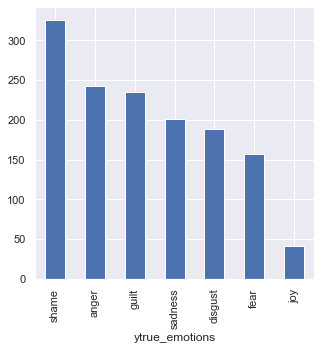

In [90]:
ms = non_match.groupby("ytrue_emotions").count()["sentence"]
ms.sort_values(ascending=False).plot.bar()

In [91]:
ms2 = non_match.groupby(["ytrue_emotions", "predictions_emotions"]).count()["sentence"]


SHAME


<AxesSubplot:ylabel='sentence'>

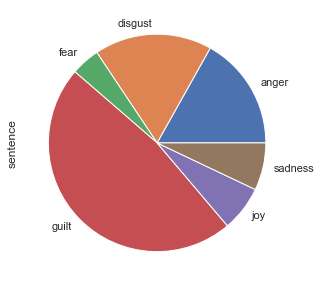

In [92]:

print("SHAME")
shame = ms2.loc["shame"]
shame.plot(kind="pie")

ANGER


<AxesSubplot:ylabel='sentence'>

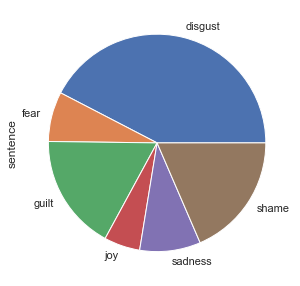

In [93]:

print("ANGER")
anger = ms2.loc["anger"]
anger.plot(kind="pie")

GUILT


<AxesSubplot:ylabel='sentence'>

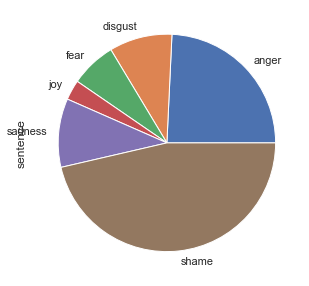

In [94]:
print("GUILT")
guilt = ms2.loc["guilt"]
guilt.plot(kind="pie")

SADNESS


<AxesSubplot:ylabel='sentence'>

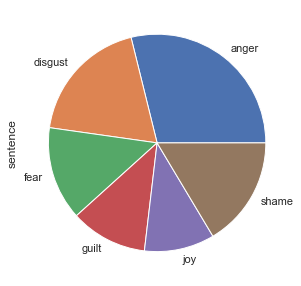

In [95]:
print("SADNESS")
sad = ms2.loc["sadness"]
sad.plot(kind="pie")

DISGUST


<AxesSubplot:ylabel='sentence'>

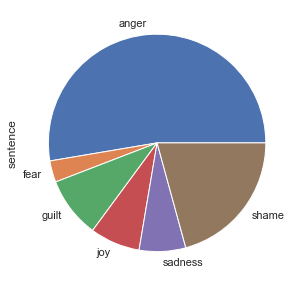

In [96]:
print("DISGUST")
dis = ms2.loc["disgust"]
dis.plot(kind="pie")

FEAR


<AxesSubplot:ylabel='sentence'>

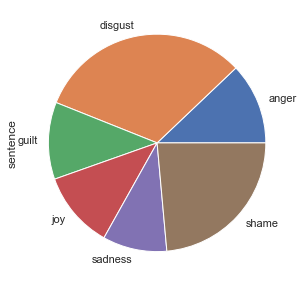

In [97]:
print("FEAR")
fear = ms2.loc["fear"]
fear.plot(kind="pie")

JOY


<AxesSubplot:ylabel='sentence'>

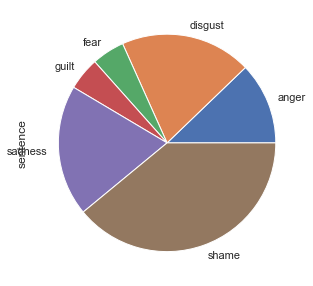

In [98]:
print("JOY")
joy = ms2.loc["joy"]
joy.plot(kind="pie")

In [99]:
"""

shame is misclassified as guilt. ##
anger is missclassified as disgust.
guilt is missclassified as shame. ##
sadness is missclassified as anger.
disgust is missclassfied as shame.
fear is missclassified as disgust.
joy is missclassified as shame.
"""

'\n\nshame is misclassified as guilt. ##\nanger is missclassified as disgust.\nguilt is missclassified as shame. ##\nsadness is missclassified as anger.\ndisgust is missclassfied as shame.\nfear is missclassified as disgust.\njoy is missclassified as shame.\n'

/Users/ItishaYadav1/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

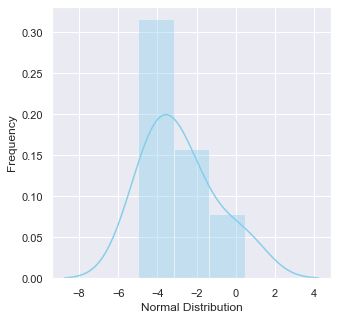

In [100]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

ax = sns.distplot(conf_df.groupby(1).mean().iloc[0],
                  kde=True,
                  color='skyblue'
                  )
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [101]:
bert_all

,sentence,ytrue,2,3,4,5,6,7,8,predictions,match,_id,ytrue_emotions,predictions_emotions
0,When I understood that I was admitted to the U...,4.0,-4.143373,-4.099311,-4.180825,-3.873905,3.270709,-3.883025,-3.976190,4.0,1,57496f41a1283e64bcd582095e0121d32d9f297a9526e5...,joy,joy
1,I broke a window of a neighbouring house and I...,1.0,-4.454488,2.634034,-3.970481,-3.600777,-4.260800,-3.508614,-4.351669,1.0,1,9f5abc554b66183e2b9de975feb3b9f02975857c4b6663...,fear,fear
2,Got a big fish in fishing.,4.0,-3.871844,-4.237987,-4.067472,-3.916490,3.443163,-4.022819,-3.743179,4.0,1,bdce673da042f3c3297dde73b1c5bfade724f8e508d3fc...,joy,joy
3,"Whenever I am alone in a dark room, walk alone...",1.0,-4.045258,3.200204,-3.871938,-3.878467,-4.119332,-3.877209,-3.389095,1.0,1,490a81728c3228478e8f9196a09d485cd8e06b8c0512c4...,fear,fear
4,I bought a possible answer to a homework probl...,5.0,-4.648178,-4.786387,-1.271109,-2.308218,-4.468682,0.195158,-2.507853,5.0,1,7db158133f1a4d68c59dc693051bfe63c47c80d906dc01...,shame,shame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,Not being a good host for a friend from a far ...,3.0,-3.077817,-5.027366,-3.306948,1.170537,-5.571788,-1.354663,-2.787492,3.0,1,e9534a6e936543dcc8437a79899a804ffce79dac3054ee...,guilt,guilt
1141,"I had a very horrible dream one night, I dream...",1.0,-4.497149,2.975088,-3.899056,-3.790592,-4.291361,-3.033495,-3.544418,1.0,1,d1a9fe0005e2d8b96fe3a97c87621da377fd26d585efd4...,fear,fear
1142,"My sweetheart left me, or rather we decided to...",0.0,2.665590,-4.259548,-3.877426,-3.458135,-3.568334,-3.607715,-3.872411,0.0,1,9715d835adb73aac1dbf805e9e8474997a614da4222656...,sadness,sadness
1143,My boyfriend made me a proposal.,4.0,-4.251548,-4.527634,-3.848884,-4.058742,3.007751,-3.362574,-4.002860,4.0,1,9b088be713afaffe47f1b751f79cf0e584f93d8613819e...,joy,joy


In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

def mlp_classifier(X, y):

    """Perform PCA"""


    oversample = SMOTE()

    X, y = oversample.fit_resample(X, y)
    print(y.value_counts())
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(X)
    reduced_data_df = pd.DataFrame(reduced_data, columns=["dim1", "dim2", "dim3"])
    print(pca.explained_variance_ratio_)
    data_col = reduced_data_df.columns
    scalar = StandardScaler()

    scalar.fit(reduced_data_df)
    # transform data
    standard_data = scalar.transform(reduced_data_df)
    standard_df = pd.DataFrame(standard_data, columns=data_col)
    print(standard_df.shape)
    print(len(y))
    """
    Data Splitting
    """
    X_train, X_test, y_train, y_test = train_test_split(standard_df, y, test_size = 0.2,
                                                        random_state = 42, stratify = y)

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

    """Model training"""

    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(max_iter=100, random_state=42, activation="tanh", solver="adam", hidden_layer_sizes=(100, ),
    learning_rate="adaptive")
    clf.fit(X_train, y_train)


    """Predictions"""

    y_pred_train = clf.predict(standard_df)
    y_pred_train_proba = clf.predict_proba(standard_df)
    # evaluate predictions
    accuracy = accuracy_score(y, y_pred_train)
    print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
    print(classification_report(y, y_pred_train))

    print(confusion_matrix(y, y_pred_train))
    print()
    print()

    # make predictions for test data
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)

    top_df_test = X_test
    top_df_test["yhat"] = y_pred
    top_df_test[["y_pred_prob_1", "y_pred_prob_2"]] = y_pred_prob
    top_df_test["ytrue"] = y_test
    top_match = []
    for ind, row in top_df_test.iterrows():
        if row["ytrue"] == row["yhat"]:
            top_match.append(1)
        else:
            top_match.append(0)
    top_df_test["match"] = top_match
    # evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))
    return top_df_test, pca, scalar, clf

"""
define y
"""
# transform the dataset
import pickle
a, pca, scalar, clf = mlp_classifier(conf_df.drop(columns=[0, 1]).reset_index(drop=True), conf_df[1])
a

1    6172
0    6172
Name: 1, dtype: int64
[0.69778251 0.14077787 0.08012801]
(12344, 3)
12344
(9875, 3) (9875,) (2469, 3) (2469,)
Train Accuracy: 78.63%
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      6172
           1       0.82      0.74      0.78      6172

    accuracy                           0.79     12344
   macro avg       0.79      0.79      0.79     12344
weighted avg       0.79      0.79      0.79     12344

[[5149 1023]
 [1615 4557]]


Test Accuracy: 78.53%
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1235
           1       0.81      0.74      0.77      1234

    accuracy                           0.79      2469
   macro avg       0.79      0.79      0.78      2469
weighted avg       0.79      0.79      0.78      2469

[[1028  207]
 [ 323  911]]


,dim1,dim2,dim3,yhat,y_pred_prob_1,y_pred_prob_2,ytrue,match
11932,0.025798,-0.149692,-0.457337,0,0.584665,0.415335,0,1
1896,0.065681,-0.340243,0.628688,0,0.553752,0.446248,0,1
11676,0.940604,-0.335730,1.115128,0,0.812400,0.187600,0,1
5695,-1.584683,-0.055771,-0.519429,1,0.058648,0.941352,1,1
12094,1.604482,0.357831,-1.617818,0,0.904240,0.095760,0,1
...,...,...,...,...,...,...,...,...
5305,-0.286557,0.129291,0.637659,1,0.323789,0.676211,1,1
11294,1.225354,-0.247352,-0.605599,0,0.860370,0.139630,0,1
9294,0.087093,-0.278348,0.033158,0,0.588168,0.411832,0,1
12330,0.088356,1.425664,0.601737,1,0.401430,0.598570,0,0


In [103]:
def get_pred(pca, scalar, model, a, b, c, d, e, f, g):
    data = [a, b, c, d, e, f, g]
    data.sort(reverse=True)
    data = np.array(data).reshape(1, -1)
    pca_data = pca.transform(data)
    standard_data = scalar.transform(pca_data)
    pred = model.predict(standard_data)
    return pred[0]

bert_all["classifier_1"] = bert_all.apply(lambda row: get_pred(pca, scalar, clf, row[2], row[3], row[4], row[5], row[6], row[7], row[8]),axis=1)
bert_all

/Users/ItishaYadav1/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ItishaYadav1/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/ItishaYadav1/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ItishaYadav1/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/ItishaYadav1/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ItishaYadav1/.local/lib/python3.9/s

,sentence,ytrue,2,3,4,5,6,7,8,predictions,match,_id,ytrue_emotions,predictions_emotions,classifier_1
0,When I understood that I was admitted to the U...,4.0,-4.143373,-4.099311,-4.180825,-3.873905,3.270709,-3.883025,-3.976190,4.0,1,57496f41a1283e64bcd582095e0121d32d9f297a9526e5...,joy,joy,1
1,I broke a window of a neighbouring house and I...,1.0,-4.454488,2.634034,-3.970481,-3.600777,-4.260800,-3.508614,-4.351669,1.0,1,9f5abc554b66183e2b9de975feb3b9f02975857c4b6663...,fear,fear,1
2,Got a big fish in fishing.,4.0,-3.871844,-4.237987,-4.067472,-3.916490,3.443163,-4.022819,-3.743179,4.0,1,bdce673da042f3c3297dde73b1c5bfade724f8e508d3fc...,joy,joy,1
3,"Whenever I am alone in a dark room, walk alone...",1.0,-4.045258,3.200204,-3.871938,-3.878467,-4.119332,-3.877209,-3.389095,1.0,1,490a81728c3228478e8f9196a09d485cd8e06b8c0512c4...,fear,fear,1
4,I bought a possible answer to a homework probl...,5.0,-4.648178,-4.786387,-1.271109,-2.308218,-4.468682,0.195158,-2.507853,5.0,1,7db158133f1a4d68c59dc693051bfe63c47c80d906dc01...,shame,shame,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,Not being a good host for a friend from a far ...,3.0,-3.077817,-5.027366,-3.306948,1.170537,-5.571788,-1.354663,-2.787492,3.0,1,e9534a6e936543dcc8437a79899a804ffce79dac3054ee...,guilt,guilt,0
1141,"I had a very horrible dream one night, I dream...",1.0,-4.497149,2.975088,-3.899056,-3.790592,-4.291361,-3.033495,-3.544418,1.0,1,d1a9fe0005e2d8b96fe3a97c87621da377fd26d585efd4...,fear,fear,1
1142,"My sweetheart left me, or rather we decided to...",0.0,2.665590,-4.259548,-3.877426,-3.458135,-3.568334,-3.607715,-3.872411,0.0,1,9715d835adb73aac1dbf805e9e8474997a614da4222656...,sadness,sadness,1
1143,My boyfriend made me a proposal.,4.0,-4.251548,-4.527634,-3.848884,-4.058742,3.007751,-3.362574,-4.002860,4.0,1,9b088be713afaffe47f1b751f79cf0e584f93d8613819e...,joy,joy,1


In [104]:

"""
Strategy to approach the research question:
    1. Filter the dataset (all) to find misclassified examples.
    2. Find out the those specific sentences and see manually, if they are the potential examples of class overlapping.
    3. Train the ORD detector, and see of the correct label for missclassfied classes are in the top 3 recommendation or not?
    4. Evaluate the bert model, using our custom evaluator
"""


"""

As discussed with Prof, go with approach one and put approach 2 in future work
ORD:

1. BERT
2. Low_vs_high confidence detector

Soft decision maker:

1. Approach 1: Rule Based

    If overlapping region detected:

    Recommend top 2 emotions

    If non overlapping region detected:

    Recommend top emotion

2. Approach 2: Machine learning based
    1. Train Classifiers:
        1. Classifier 1 checks if top 2 can be recommended.
        2. Classifier 2 checks, if top 3 can be recommended.
        3. Worst case senario: model not confident with the emotion.
"""

'\n\nAs discussed with Prof, go with approach one and put approach 2 in future work\nORD:\n\n1. BERT\n2. Low_vs_high confidence detector\n\nSoft decision maker:\n\n1. Approach 1: Rule Based\n\n    If overlapping region detected:\n\n    Recommend top 2 emotions\n\n    If non overlapping region detected:\n\n    Recommend top emotion\n\n2. Approach 2: Machine learning based\n    1. Train Classifiers:\n        1. Classifier 1 checks if top 2 can be recommended.\n        2. Classifier 2 checks, if top 3 can be recommended.\n        3. Worst case senario: model not confident with the emotion.\n'

In [112]:
mapping_2 = {0: "non_agreement", 1: "agreement"}
mapping_3 = {0: "overlap", 1: "non-overlap"}
bert_all["agreement_flag"] = bert_all["match"].map(mapping_2)
bert_all["classifier_flag"] = bert_all["classifier_1"].map(mapping_3)
bert_all.groupby(["agreement_flag", "classifier_flag"]).count()["sentence"]


agreement_flag  classifier_flag
agreement       non-overlap        4557
                overlap            1615
non_agreement   non-overlap         238
                overlap            1209
Name: sentence, dtype: int64

In [109]:
import warnings
warnings.filterwarnings("ignore")

non_match["classifier_1"] = non_match.apply(lambda row: get_pred(pca, scalar, clf, row[2], row[3], row[4], row[5], row[6], row[7], row[8]),axis=1)
non_match["agreement_flag"] = non_match["match"].map(mapping_2)
non_match["classifier_flag"] = non_match["classifier_1"].map(mapping_3)
non_match.groupby(["agreement_flag", "classifier_flag"]).count()["sentence"]

agreement_flag  classifier_flag
non_agreement   non-overlap         238
                overlap            1153
Name: sentence, dtype: int64

In [106]:
"""
1. Setting foundation for research question using results from BERT:
   a) Correct and Wrong classifications were grouped to see the probability distribution.
            1. There was larger difference between first proba and second proba for correct classification as compared to wrong classification.
            2. The bert output confidence value for high for correct classifications.
   b) 19% of the miss-classified instances were sampled and plotted the miss-classified classes in descending order.
   c) created pie charts for to show class overlaps.
"""

match  ytrue
0      0         207
       1         323
1      0        1028
       1         911
Name: dim1, dtype: int64